In [ ]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/ikaro/ETH_1min/data/raw/ETHUSD_1m_Binance.csv")

<Axes: xlabel='Open time'>

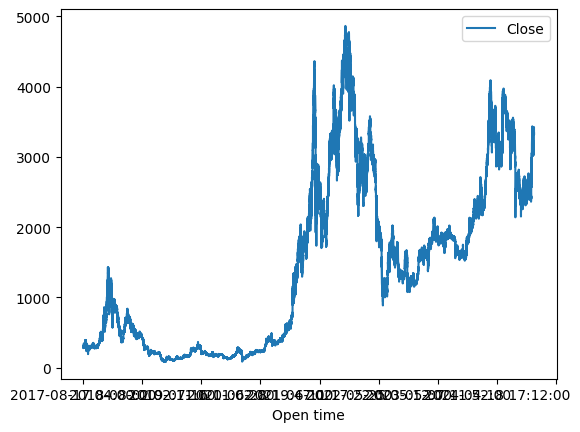

In [7]:
df.plot(x="Open time", y="Close", kind="line")

In [8]:
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [25]:
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-08-17 04:00:00,301.13,301.13,301.13,301.13,0.42643,2017-08-17 04:00:59.999,1.284109e+02,2.0,0.42643,1.284109e+02,0.0
1,2017-08-17 04:01:00,301.13,301.13,301.13,301.13,2.75787,2017-08-17 04:01:59.999,8.304774e+02,4.0,2.75787,8.304774e+02,0.0
2,2017-08-17 04:02:00,300.00,300.00,300.00,300.00,0.09930,2017-08-17 04:02:59.999,2.979000e+01,2.0,0.09930,2.979000e+01,0.0
3,2017-08-17 04:03:00,300.00,300.00,300.00,300.00,0.31389,2017-08-17 04:03:59.999,9.416700e+01,3.0,0.00000,0.000000e+00,0.0
4,2017-08-17 04:04:00,301.13,301.13,301.13,301.13,0.23202,2017-08-17 04:04:59.999,6.986818e+01,1.0,0.23202,6.986818e+01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3813672,2024-11-22 13:04:00,3342.71,3343.60,3336.96,3337.96,671.32830,2024-11-22 13:04:59.999,2.242068e+06,7618.0,275.63370,9.205678e+05,0.0
3813673,2024-11-22 13:05:00,3337.96,3337.96,3333.51,3333.91,697.36930,2024-11-22 13:05:59.999,2.325674e+06,9049.0,302.37940,1.008335e+06,0.0
3813674,2024-11-22 13:06:00,3333.91,3336.60,3333.33,3334.80,777.20470,2024-11-22 13:06:59.999,2.591680e+06,7803.0,385.05730,1.284016e+06,0.0
3813675,2024-11-22 13:07:00,3334.80,3335.52,3331.54,3335.52,737.63490,2024-11-22 13:07:59.999,2.458663e+06,6475.0,504.60570,1.681857e+06,0.0


In [30]:
import pandas as pd
import numpy as np


class DataValidation:
    def __init__(self, df):
        self.df = df
        self.issues = {}

    def check_missing_values(self):
        missing = self.df.isna().sum()
        self.issues["missing_values"] = missing[missing > 0].to_dict()
        return missing

    def check_data_types(self, expected_types):
        """expected_types é um dicionário, ex: {'Open time': 'datetime64[ns]', 'Open': 'float'}"""
        type_issues = {}
        for col, expected_type in expected_types.items():
            if col in self.df.columns:
                if self.df[col].dtype != expected_type:
                    type_issues[col] = {
                        "expected": expected_type,
                        "found": self.df[col].dtype,
                    }
        self.issues["type_mismatches"] = type_issues

    def check_duplicates(self):
        duplicates = self.df.duplicated().sum()
        self.issues["duplicates"] = duplicates
        return duplicates

    def validate(self):

        missing = self.check_missing_values()
        duplicates = self.check_duplicates()
        data_types = self.check_data_types(
            {
                "Open time": object,
                "Open": np.float64,
                "High": np.float64,
                "Low": np.float64,
                "Close": np.float64,
                "Volume": np.float64,
                "Close time": object,
                "Quote asset volume": np.float64,
                "Number of trades": np.float64,
                "Taker buy base asset volume": np.float64,
                "Taker buy quote asset volume": np.float64,
                "Ignore": np.float64,
            }
        )

        return self.issues

In [31]:
df.dtypes

Open time                        object
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close time                       object
Quote asset volume              float64
Number of trades                float64
Taker buy base asset volume     float64
Taker buy quote asset volume    float64
Ignore                          float64
dtype: object

In [32]:
c = DataValidation(df)
c.validate()

{'missing_values': {}, 'duplicates': np.int64(0), 'type_mismatches': {}}

In [ ]:
c > 0

TypeError: '>' not supported between instances of 'DataValidation' and 'int'

In [18]:
df.isna().sum().sum()

np.int64(0)

In [24]:
c